# 09/10/20
Post-vacation contact with supervisor - added to Slack and given paper on Bayesian Machine learning in metamaterial design to read (https://onlinelibrary-wiley-com.ezp.lib.cam.ac.uk/doi/full/10.1002/adma.201904845#adma201904845-fig-0002).

# 11/10/20
Testing GPyOpt functionality with their manual examples and functions from https://en.wikipedia.org/wiki/Test_functions_for_optimization. 1D and 2D straightforward with visuals. Tried with higher dimensional problems (n>=10) - sphere function was fine, but less optimal when the function is rough and needs more iterations (local minima).

# 12/10/20
Formalise testing - see gpyopt_test.py
Added timing - 15 iterations for 2D Booth function and 10D sphere function both took around 5s to run, 40 iterations for 10D Rastrigin function took 13s with f(x) error of 0.8. Not bad!
Made github repo for project.

# 13/10/20
Call with supervisor to outline next steps:
* Further testing with GPyOpt
    * evaluation time, no. of evaluations to optimum
    * compare different acquisition functions
    * test with non-linear functions (introduce discontinuities)
    * sparse Gaussian processes to lower compute time
* Consider multi-fidelity Gaussian processes - data from multiple sources
* Look into deep learning methods for optimisation - fast.ai

# 25/10/20
Acquisition function $$u(x)$$ guides finding new samples in objective function. Balance exploration (samples from unexplored/high uncertainty areas) and exploitation (samples around current optimum, drill down to true (local) optimum). Formally, take sample where $$\mathbf{x}=\underset{\mathbf{x}}{\arg \max} u(x|\mathcal{D}_{1:t-1})$$ where $$\mathcal{D}_{1:t-1}$$ is data up to this point. Most common acquisition functions are Maximum Probability of Improvement (MPI), Expected Improvement (EI) and Upper Confidence Bound (UCB).

Testing of GPyOpt - evaluation time and accuracy when varying noise, maximum iterations, acquisition function, dimension, function type (convex?). Results given in gpyopt_test_results.xlsx

Biggest factors in accuracy loss, ceteris paribus:
* roughness of function, gets stuck in local minima for a long time
* number of dimensions/parameters, high dimensional inputs take longer to calculate/train to good accuracy

Still to do: 
* testing with non-linear functions
* investigate sparse GP (can test very easily but what is it doing differently behind the scenes?)
* set up multi-fidelity GP

Can parallelise optimisation - biggest bottleneck in evaluating objective function (according to GPyOpt documention). This needs further investigation to find where it can actually help, especially in reference to batches.

Spoke to Tianyi (PhD student) about her finite element model code in C++. Will have this resource to output results but will need integrating into Python. Consider adapting code/look into existing Python libraries (e.g. SfePy).

Thoughts on presentation outline: 
* introduce and walk through Gaussian Processes for 1D/2D
* give example where optimization might be useful (minimise weight for a component while keeping strength above certain threshold)
* connect GP with structures
* pros and cons

Report can probably also follow this general outline, with more specific examples and experiments to show optimisation in practice for simple and complex structures. Aim to have end result of a useable modular code base that can be used to perform GP optimisation on any defined structure problem.

# 26/10/20
Action points coming out of call with supervisor:
* use relative errors
* does optimisation slow with number of iterations? (should do from covariance matrix getting larger and harder to invert)
* test sparse GP as way to combat costly computations
* look into python FEM libraries
* start thinking about structural problems to centre final experimentation around
* test multi-fidelity GP

Make sure to keep bank of images/graphs to put in report, systematically go through interest points and build up story.

# 01/11/20
Relative error wrt true **X** not possible when true **X** is 0. Similar for f(**X**). (For real structural optimisation problems this is unlikely to be a problem.) 2 options:
* Measure relative error percentage wrt benchmark error - GP model always imperfect, what can we accept as "expected error"? 
* Add constant component to true function to work around minimum f(**X**)=0 problem.

First option encodes error tolerance, which is useful for real problems. Optimising certain variables accurately has smaller influence on the final result than other variables. To measure relative error fairly, this benchmark error should change with complexity of problem. We can also choose benchmark error as the average error.

Second option is an easy work-around which does not require us to choose a benchmark error. However the added constant component would be arbitrary and not add information, just a way to turn errors into percentage errors.

Performed additional testing with sphere and rastrigin functions at 10-D. Fixing everything else, I varied the number of iterations and recorded the time taken per iteration. I repeated this for 5 rounds and plotted the averages. From the graph in Sheet 6 of gpyopt_test_results.xlsx, can see that it is obvious for the sphere function that optimisation slows with the number of iterations. However, this is not as clear for the rastrigin function - there is still a vague trend showing the optimisation shows, but the graph is much more level. Not sure why this is? **something to look into

Sparse GP supposed to speed up process of inverting covariance matrix but not seeing this, in fact seeing a significant slow down in time taken to run a fixed number of iterations. Why is this?

SfePy can be used but need to figure out how to generate new meshes - ask supervisor about this. Everything specified in problem description file and solved with one command (easy to use but hard to debug).

# 03/11/20
Sparse GP issue was coding bug, now seeing speed up from using sparseGP model. Seems to be useful for fitting to lots of data points but not for doing optimization where it uses acquisition function to find new points. Why? 2866s to optimise with 10,000 data points (2D) with sparseGP, several hours and still not complete for GP.


# 04/11/20
Action points out of meeting with supervisor:
* look at GPy to check what sparse GP model is doing
* look into PyNite for FEM (https://github.com/JWock82/PyNite)
* test with constrained functions (constrain volume of materials etc)
* do first draft of presentation for next week

# 12/11/20
First draft of presentation completed. Sent to supervisor for content check, aim to run through at next meeting before presentation day (26/11/20).
sparseGP model needs inducing samples that are drawn from X and Y inputs to BayesianOptimisation function, so cannot be run just using acquisition function. Idea is to summarise large amount of data using a small numer of pseudo-data (e.g. highlight peaks and valleys). Uses Variational Free Energy model - approximation of posterior distribution, minimising KL divergence between the 2 functions. Need to dig into this more.
(References for later: 
* https://towardsdatascience.com/sparse-and-variational-gaussian-process-what-to-do-when-data-is-large-2d3959f430e7
* http://proceedings.mlr.press/v5/titsias09a/titsias09a.pdf
* https://www.youtube.com/watch?v=sQmsQq_Jfi8
* http://gpss.cc/gpss17/slides/gp-approx-new.pdf
)


# 17/11/20
Action points:
* edits on presentation
* connect FEM and GP
* multi-fidelity GP - look at papers, extend library?
    * low fidelity by treating structural parts independently
    * high fidelity - only take a few points of super complex model
    
Major bottleneck in structural optimisation is actually is calculating points - running FEM models takes a long time. So sparseGP might not actually be best optimisation route, want to consider multi-fidelity GP instead. Takes lots of samples of a function that is cheap to evaluate and a few ssamples of a related (expensive) function, combine data sets to get better estimate of expensive function.

# 21/11/20
References for multi-fidelity GP:
* https://arxiv.org/pdf/1604.07484.pdf
* https://arxiv.org/pdf/1603.06288.pdf
* https://icerm.brown.edu/materials/Abstracts/tw-17-4/Gaussian_processes-_A_hands-on_tutorial_]_Paris_Perdikaris,_Massachusetts_Institute_of_Technology.pdf
* https://github.com/paraklas/GPTutorial/tree/master/code

How to get low fidelity data points for structural problems?
https://caendkoelsch.wordpress.com/2017/05/20/ways-to-reduce-the-computational-time-in-a-fem-simulation/#:~:text=The%20first%20and%20most%20common,a%20step%20in%20the%20simulation.
* FEM with larger (and fewer) finite elements - less computation time, more error
* adding rigid body constraints may apply for some problems
* adding symmetry



# 22/11/20
Set up a function using PyNite to output the max deflection and total weight of an example structure - what is the objective function? Want to minimise wrt both jointly somehow - add two terms with a given variable to set relative cost. (Can also try to figure out how to do multi output GP optimisation. This is related to multi-fidelity GP so worth thinking about anyway.)

# 23/11/20
Multifidelity code from GPTutorial - REMEMBER TO REFERENCE. Need to check maths and try to expand to multi-dim since throwing errors right now. If this fails try MatLab code from https://github.com/maziarraissi/TutorialGP.

Action points from meeting with Fehmi:
* Edits in presentation for Thrusday
* Write out VTK Polydata to vtu file to read in Paraview - figure out how to do this (writepolydata?)
* Do multifidelity in >1D

# 29/11/20
Got multifidelity GP working in >1D. Tested with Booth and Sphere functions and obtained fairly low L2 errors. Visualised prediction vs actual functions in 2D and saw good fit.

# 01/12/20
https://arxiv.org/pdf/1912.00392.pdf gives experimental plan using multi-fidelity GP
Experiment plan:
* find a structure of interest and create model in PyNite
* create simplified model for low-fidelity data
* experiment design to find where to take initial points - obtain initial high fidelity data
* similarly obtain initial low fidelity data
* use acquisition function on low-fidelity to find next point
* use acquisition function on high-fidelity to find next point
* repeat until satisfied
* find min y_pred+y_var using multi-fidelity GP

http://auai.org/uai2019/proceedings/papers/284.pdf for a multi-fidelity friendly acquisition function

# 02/12/20
Action Points:
* figure out how to make bayesian multi-fidelity - see 01/12/20
* find structures problem to experiment with - preferably high texture/complex so easy way to make low-fidelity mdoel

# 16/01/21
* https://arxiv.org/pdf/1012.2599.pdf for detailed description of acqusition functions
* http://proceedings.mlr.press/v89/song19b/song19b.pdf or https://arxiv.org/pdf/1603.06288.pdf for more possible multifidelity framework
* https://www-sciencedirect-com.ezp.lib.cam.ac.uk/science/article/pii/S026412752030085X for an possible final test structure - experiment laid out but uses different optimisation method, nice for compare and contrast

# 18/01/21
Completed Technical Milestone Report - sent to supervisor for read-through and feedback to hand-in on 21/01/21.

# 24/01/21
Starting to write beam model for final test structure. Some questions - what do I do with members that overlap? How to do varying number of non-basic nodes for optimisation? (maybe do a number of nodes at a time and then create pareto frontier) How to make this actual 3D element model???

# 01/02/21

Finished writing code for beam model, haven't dealt with overlapping members really since the model has infinitesimally thin members so ignoring that for now. Inputs are just number of units, list of non-basic node classes (includes name and relative position to origin of a unit) and list of member property classes. Will change that to calculate the properties based on input dimensions later. For the optimisation, I want to optimise across number of non-basic nodes. However, the input list for member properties has to be constant. Potential solution: set maximum number of non-basic nodes, make the list the appropriate length for that and set some to zero. Will need to test this, might be easier just to do local optimisations and plot the results to estimate global optimum.

For the optimisation, should do 2 types and compare - constrain weight and minimise deflection or a weighted sum of the 2, varying weights to get Pareto frontier.

Downloaded ABAQUS on Windows laptop and can maybe use that to do the 3D element model? Can be a check on FEA results from PyNite and obtain some "high-fidelity" results by hand.

# 04/02/21
Effective EIs calculated using different tip loads are the same in PyNite (as expected). EI calculated as $$\frac{F_{tip}L^3}{3\Delta_{max}}$$. Using the (Lim et al) paper as guide for experimental procedure. Will use their method of Single Objective optimisation to do the optimisation as out of scope to perform multi-objective optimisation. Found that cannot do custom function constraints in GPyOpt so will simply as max(diff, 0) in objective function.

# 07/02/21
Finished setting up optimisation - optimising for node position and member diameters. Decided against making an input the number of nodes since added dimensionality will slow the optimisation which is probably inefficient when many of the inputs are wasted for the fewer node cases.

Right now optimising for weight while weighting heavily on difference to required EI, will talk to supervisor on 09/02 to discuss this as unsure best way to approach. Can continue with this path, change to optimise for EI while fixing weight if more intuitive? Included some constraints from the Lim et al paper - function outputs $10^9$ if smallest member length less than 1% of unit cell size, or if EI given as nan (equiv to nodes not connected fully)

Domain has to be continuous so for member diameters starting from 0 to 0.1m, but not putting member in if d<1mm.

TODO: set up to iterate through number of nodes and required EI/density, plot Pareto frontier. Should I time the process? Beam set up means that the FEA process is actually really fast. Maybe use this to talk about meta-materials and how this is a good way to optimise for the design? Will talk to supervisor about how to get "high-fidelity" data for this set-up.

# 09/02/21

Meeting with supervisor today, questions to discuss:
* How to do “high-fidelity” model - PyNite handles beam model well, downloaded student ABAQUS, could hand make a few models to get data points - compare/use as HF?
* Alternative use solid beam as LF maybe, inputs lead to beam dimensions (match weight, Iy and Iz?), should reduce number of iterations needed for the actual beam model?
* Can’t use external function to make constraint in GPyOpt (e.g. calculate mass and constrain it) so will use single-objective w/ penalisation, limit EI (equivalent mass solid beam) maybe?

L/HF - can make truss vs beam - releasing moments, or add more parameters (optimisise unit cells independently)


# 16/02/21

Can't exactly turn structure into truss instead of beam as stiffness matrix singular, but can release moment reactions at nodes.

3 options for low-fidelity models to try:
* Truss-type - same as beam structure but release moments at nodes
* Model only one unit cell (maybe modify objective function?)
* Solid beam, match weight (maybe beam is with 3D elements rather than wireframe model to increase fidelity?)

Forgot to put here but as mentioned in Milestone Report, will be attempting the multifidelity process from Zhang et al first - only using the multifidelity part at the end with all samples.

# 18/02/21
Finished adding all low-fidelity models, did some rejigging just to make code a bit cleaner. Now have 3 different models that take same inputs that can be swapped in and out for HF/LF options. Should do full multifidelity process next.

train GP using few data points, use the mean function as low fidelity model - stack coarse models (can use different types)

# 10/03/21

Lost some time due to other deadlines and travelling home during COVID times.
Putting together the full multifidelity optimisation process - having some troubles:
1. Truss model consistently giving nan values for EI, indicates singular stiffness matrix
2. Had not realised the problem but was obvious in retrospect, once a multifidelity model from high and low fidelity data points are created, how to find minimium? Can do a stacked bayesian optimisation by sampling the mean function (or mean minus variance to increase certainty), or is there a way to differentiate the mean wrt X?

Found that when timing the different fidelity functions, the time taken to run the truss model is on the same order of the time taken to run the beam model - redundant, no effort saved with lower fidelity. Scrap truss model.

# 11/03/21
Gaussian process model seems to have trouble dealing with the non-continousness of objective function - particularly multifidelity regression part, gives consistent "matrix not positive definite" errors when training the model, which indicate kernel inappropriateness. Kernel set as rbf, which should deal well with most smooth functions but objective functions has steps stemming from large values given if conditions are violated.

Solution: condition data points provided to multifidelity part, only data under threshold given.

Also, sampling from the multifidelity function as another objective function with bayesian optimisation to find a different optimum. Main thing still to unsure on is what the objective function to use here - just the mean value for some X* (assuming the mean is larger than 0), or add variance information somehow? For now returning mean value if greater than 0, 10^9 otherwise.

Additionally, may want to still add a low fidelity option of a model trained on just a few data points from the high fidelity model!

Set up another class to run through whole optimisation process that take inputs for number of nodes, which models are used, the required EI and number of iterations in each step. Will run through some variations overnight/tomorrow morning and gather data in a spreadsheet.

# 12/03/21
Spoke with supervisor to provide progress update as outlined above. Still collecting data, will collate and analyse tomorrow.

# 13/03/21
Excel spreadsheet optimisation_results.xlsx for analysing preliminary optimisation data. Some observations:
1. There seem to be few instances of the multifidelity model improving on the high fidelity model’s score.
2. The sparse MF model seems to get better/similar scores while taking less time.
3. Using the count/average of min(mf_score - hf_score, 0) to look at the data gives a sense of how much the multifidelity model can improve on the high fidelity model under given settings. The best improvements are when few iterations of the high fidelity model optimisation are performed - this should be expected.

The next step will be to select some parameters and use them to perform the optimisation for more different n (number of non-basis nodes) values. Compare against beam of n=0 (where all members are the same size) of equivalent mass? Better comparison than circular cross section cantilever.

# 18/03/21
Data as instructed in last entry collected. Going into hiatus over Easter break to concentrate on exams.

# 12/05/21
Picked up project again after exams.

Built the function for finding the EI of the equivalent beam (as in entry 13/03/21) into the test_struct class.

Beginning to write the final report now - currently outlining base theory and mathematics for GP and BO, including sparse and multi-fidelity models.

Tentative TOC:
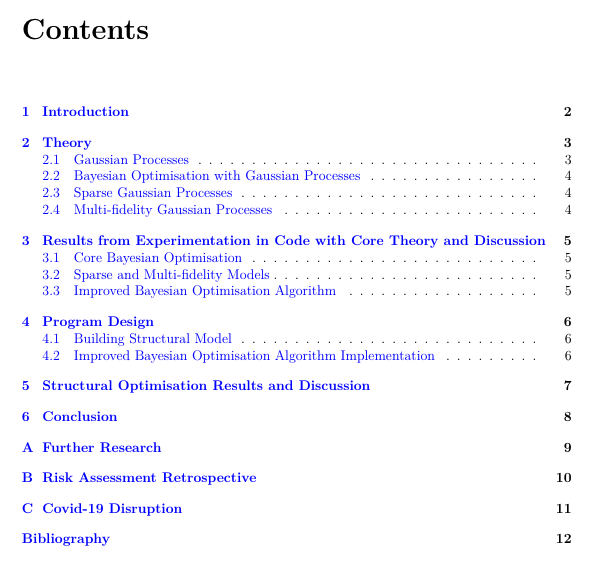

# 18/05/2021
Rerunning some preliminary tests for bayesian optimisation to get nicer graphs with more data.
Writing up experimentation with core theory part. Will send the draft to supervisor tonight with (hopefully) 2 out of 3 core chapters finished.

# 20/05/2021
Received some feedback on work so far (theory, preliminary experimentation). Continuing with write up. Minor edit in optimise_structure to add jitter if mf model training gets "Matrix not positive definite" error. Re-running structure optimisations for better/more data. Running full optimisations of structure varying $n$ with different settings.

# 26/05/2021
More of report done. Some informal testing with the last bit of optimisation of MF function - since it's cheap to evaluate tried gradient descent using scipy.optimize.minimize, works well! Much less likely to give points that violate constraints, and takes a lot less time. Going to rerun some data collection to get nice graphs and do full structure optimisation with that. Will write up further research to be done for now.